In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt

In [2]:
def load_bid_log(file,skip = True):
    
    s = file[5:10]
    if skip:
        df_raw = pd.read_csv(file)
    else:
        df_raw = pd.read_csv(file,skiprows =0)
    # df.info()

    df = df_raw.copy()
    if skip:
        df =df[['Project Name','Project Description','City','Local','Project Type','Bid Type','Design Type','Estimator','DEPT',' Base Bid ','Bid Status']]
    else:
        df =df[['Project Name','Project Description','City','Local','Project Type','Bid Type','Design Type','Estimator','DEPT','  Base Bid  ','Bid Status']]
    is_NaN = df.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = df[row_has_NaN]
#     print(rows_with_NaN)
    return df,s

In [3]:
yearly_bid_data=[]

In [4]:
def pipe(df,s, f = False):
    df.dropna(inplace =True)
    
        
    df.drop(df[df['Bid Status']== 'Not Bid'].index,inplace =True)
    if f:
        df.drop(df[df['  Base Bid  ']== '-'].index,inplace =True)
        df['  Base Bid  ']=(df['  Base Bid  '].str.strip('$ \n'))
        df['  Base Bid  ']= df['  Base Bid  '].apply(lambda x: int(x.replace(',','')))
        df[' Base Bid '] = df['  Base Bid  ']
        df.drop(['  Base Bid  '],axis = 1, inplace = True)
    else:
        df.drop(df[df[' Base Bid ']== '-'].index,inplace =True)

        df[' Base Bid ']=(df[' Base Bid '].str.strip('$ \n'))
        df[' Base Bid ']= df[' Base Bid '].apply(lambda x: int(x.replace(',','')))
    
    tit= s + 'Pandas Profiling Report'
    print(tit)
    return  ProfileReport(df, title=tit, html={'style':{'full_width':True}}), df

In [8]:
# dropping useful data


df, s = load_bid_log('2015 Bid Log.csv',False)

In [10]:
profile_2015,data_15 = pipe(df,s,True)
yearly_bid_data.append(data_15)

Bid LPandas Profiling Report


In [13]:
# dropping useful data
df,s = load_bid_log('2016 Bid Log.csv')


In [15]:
profile_2016,data_16 = pipe(df,s)
yearly_bid_data.append(data_16)

Bid LPandas Profiling Report


In [16]:
df,s = load_bid_log('2017 Bid Log.csv')

In [18]:
profile_2017,data_17 = pipe(df,s)
yearly_bid_data.append(data_17)

Bid LPandas Profiling Report


In [19]:
df,s = load_bid_log('2018 Bid Log.csv')


In [21]:
profile_2018,data_18 = pipe(df,s)
yearly_bid_data.append(data_18)

Bid LPandas Profiling Report


In [23]:
df,s = load_bid_log('2019 Bid Log.csv')

In [25]:
profile_2019,data_19 = pipe(df,s)
yearly_bid_data.append(data_19)

Bid LPandas Profiling Report


In [20]:
profile_2015

In [357]:
profile_2016

In [361]:
profile_2017 

In [344]:
profile_2018

In [22]:
profile_2019

In [26]:
len(yearly_bid_data)

5

In [27]:
yearly_bid_data

[                                          Project Name  \
 0                             Hoag Irvine ED Expansion   
 1                            HHNB Cancer Center Clinic   
 2                       Disney Niguel Cast Parking Lot   
 3                Parking Lot lighting vandalism repair   
 4                                OCC Car charger power   
 ..                                                 ...   
 329                                    ASM Restack III   
 331  HHI Fluoroscopy Remodel/Special Procedure Rm E...   
 333              Cylance Two new poke thru connections   
 334                       Bbraun Still compressor Fans   
 338                                          OCMMC MOB   
 
                  Project Description             City     Local Project Type  \
 0     Emergency Department Expansion           Irvine   441 OC     Hospital    
 1    TI of cancer center exam rooms     Newport Beach   441 OC     Hospital    
 2           10 acre cast parking lot          

In [28]:
bid_data = pd.concat(yearly_bid_data)

In [29]:
bid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586 entries, 0 to 395
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Name         1586 non-null   object
 1   Project Description  1586 non-null   object
 2   City                 1586 non-null   object
 3   Local                1586 non-null   object
 4   Project Type         1586 non-null   object
 5   Bid Type             1586 non-null   object
 6   Design Type          1586 non-null   object
 7   Estimator            1586 non-null   object
 8   DEPT                 1586 non-null   object
 9   Bid Status           1586 non-null   object
 10   Base Bid            1586 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 148.7+ KB


In [30]:
bid_data.groupby('Bid Status').count()

Project Name  Project Description  City  Local  Project Type  \
Bid Status                                                                 
Awarded              642                  642   642    642           642   
Bidding               12                   12    12     12            12   
Lost                 180                  180   180    180           180   
Not Built             63                   63    63     63            63   
Pending              648                  648   648    648           648   
Prospect               1                    1     1      1             1   
Unknown               40                   40    40     40            40   

            Bid Type  Design Type  Estimator  DEPT   Base Bid   
Bid Status                                                      
Awarded          642          642        642   642         642  
Bidding           12           12         12    12          12  
Lost             180          180        180   180         180  
Not Built         63           63         63    63          63  
Pending          648          648        648   648         648  
Prospect           1            1          1     1           1  
Unknown           40           40         40    40          40

In [31]:
bid_data['Bid Status'].unique()

array(['Pending', 'Lost', 'Awarded', 'Not Built', 'Unknown', 'Bidding',
       'Prospect'], dtype=object)

In [32]:
bid_data['Bid Status'].replace({'Unknown': 'Lost'},inplace = True)

In [33]:

model_data = bid_data[(bid_data['Bid Status'] =='Awarded')|(bid_data['Bid Status'] =='Lost')]

In [34]:
model_data

Project Name  \
1                        HHNB Cancer Center Clinic   
2                   Disney Niguel Cast Parking Lot   
3            Parking Lot lighting vandalism repair   
4                            OCC Car charger power   
5                      EMC2 new twist lock outlets   
..                                             ...   
377           Epson Carson New power for Surepress   
378        Newport Lido 361 Elevator room AC power   
380    B|Braun Medical, Stability Area Basket tray   
381                             Charter new outlet   
387  Espson Long Beach suite 5550 relocate outlets   

                           Project Description           City     Local  \
1              TI of cancer center exam rooms   Newport Beach   441 OC    
2                     10 acre cast parking lot        Anaheim   441 OC    
3                         Repull stolen wiring         Irvine   441 OC    
4                  install 4 dual car chargers     Costa Mesa   441 OC    
5                      Install 4 L6-30 outlets         Irvine   441 OC    
..                                         ...            ...       ...   
377                        New Surepress power         Carson   441 OC    
378             Power for AC for elevator room  Newport Beach   441 OC    
380  Install basket tray from stability to IDF         Irvine   441 OC    
381         New outlet in 8th floor office 110       Cerritos   441 OC    
387        Remove 5 and relocate 2 receptacles     Long Beach   441 OC    

     Project Type           Bid Type     Design Type Estimator    DEPT  \
1       Hospital        Competitive      Engineered      Rudy    Est.    
2      Comercial        Competitive      Engineered      Rudy    Est.    
3           Site    Select Bid List    Design/Build     Doyle    S.P.    
4      Comercial    Select Bid List    Design/Build     Doyle    S.P.    
5             TI    Select Bid List    Design/Build     Doyle    S.P.    
..            ...                ...             ...       ...     ...   
377           TI    Select Bid List    Design/Build     Doyle    S.P.    
378           TI    Select Bid List    Design/Build     Doyle    S.P.    
380   Industrial         Negotiated    Design/Build     Brian    S.P.    
381           TI    Select Bid List    Design/Build     Doyle    S.P.    
387           TI    Select Bid List    Design/Build     Doyle    S.P.    

    Bid Status   Base Bid   
1         Lost        9490  
2      Awarded      646805  
3      Awarded       13800  
4         Lost       39800  
5      Awarded        2922  
..         ...         ...  
377    Awarded       18932  
378    Awarded        2800  
380    Awarded       24983  
381    Awarded         500  
387    Awarded        1400  

[862 rows x 11 columns]

In [35]:
model_data['Bid Status'].unique()

array(['Lost', 'Awarded'], dtype=object)

In [36]:
model_data[model_data['Estimator'] ==' Bill  '].index


Int64Index([ 67, 131, 292,   2,  35,  51,  83,  85, 114, 189, 210, 211, 256,
            330,  80, 125, 176, 272, 330],
           dtype='int64')

In [37]:
model_data.at[303,'Local'] = ' 441 OC '


In [38]:
# model_data.drop(model_data.index[303], inplace = True)

In [39]:
model_data['Bid Type'].unique()

array([' Competitive ', ' Select Bid List ', ' Budget ', ' Negotiated ',
       'Select Bid List', ' Public Works '], dtype=object)

In [40]:
ProfileReport(model_data, title='model_data ', html={'style':{'full_width':True}})

In [41]:
model_data.to_csv('data/bid_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/bid_data.csv'

In [42]:
model_data[model_data[" Base Bid "]<=10000].count()

Project Name           425
Project Description    425
City                   425
Local                  425
Project Type           425
Bid Type               425
Design Type            425
Estimator              425
DEPT                   425
Bid Status             425
 Base Bid              425
dtype: int64

Text(0, 0.5, 'Bid Count')

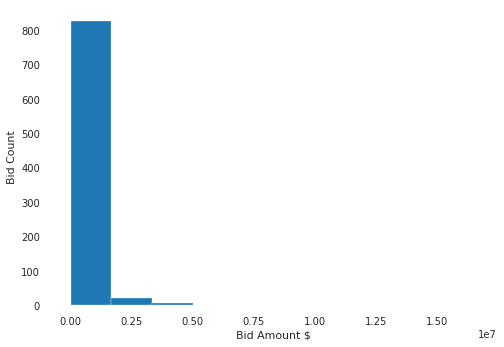

In [52]:

fig, ax = plt.subplots()

# Draw the graph
ax.hist(model_data[" Base Bid "])

# Set the label for the x-axis
ax.set_xlabel("Bid Amount $")

# Set the label for the y-axis
ax.set_ylabel('Bid Count')

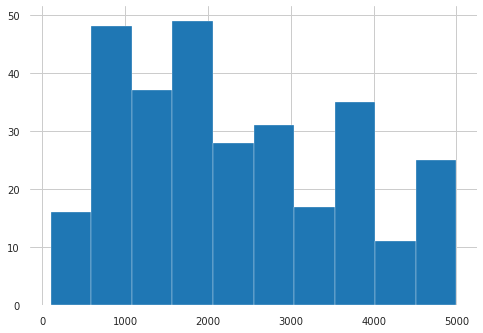

In [331]:
model_data[" Base Bid "].hist(range=[100,5000])

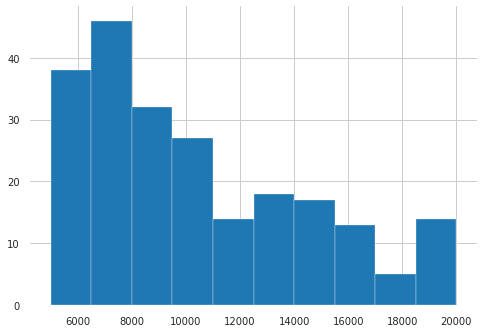

In [332]:
model_data[" Base Bid "].hist(range=[5001,20000])

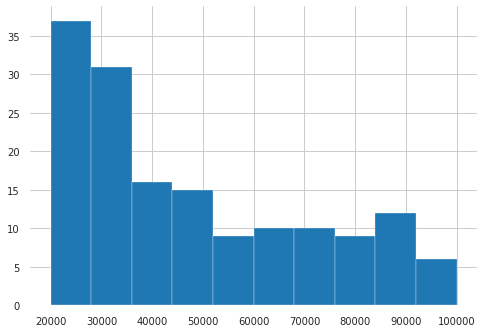

In [333]:
model_data[" Base Bid "].hist(range=[20001,100000])

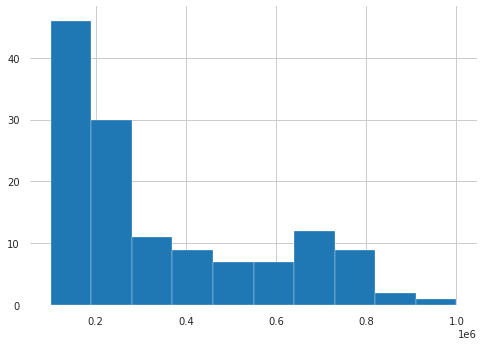

In [334]:
model_data[" Base Bid "].hist(range=[100001,1000000])

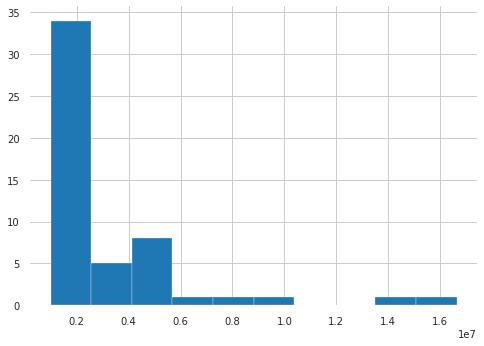

In [335]:
model_data[" Base Bid "].hist(range=[1000001,16635401])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe236e80450>,
      dtype=object)

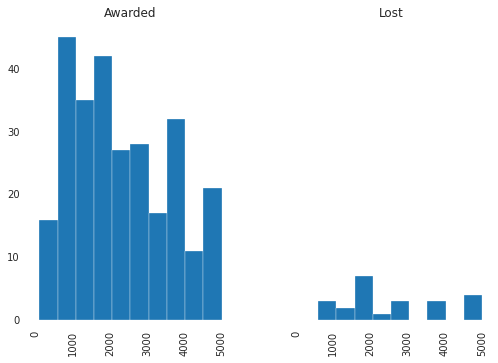

In [336]:
model_data[" Base Bid "].hist(by= model_data['Bid Status'],range =[100,5000],sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe23c6aff90>,
      dtype=object)

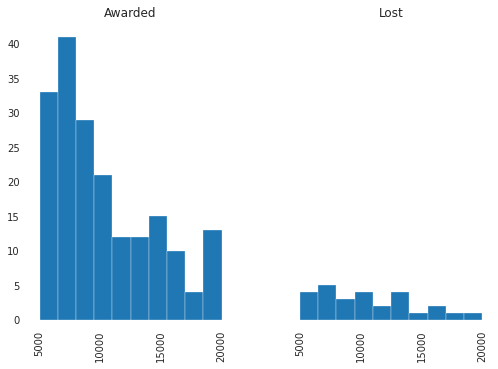

In [134]:
model_data[" Base Bid "].hist(by= model_data['Bid Status'],range =[5001,20000],sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe23c5381d0>,
      dtype=object)

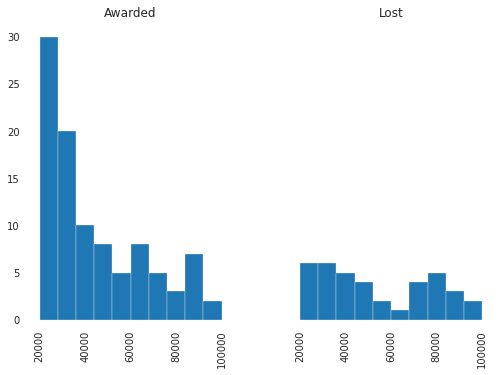

In [135]:
model_data[" Base Bid "].hist(by= model_data['Bid Status'],range =[20001,100000],sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe23c613650>,
      dtype=object)

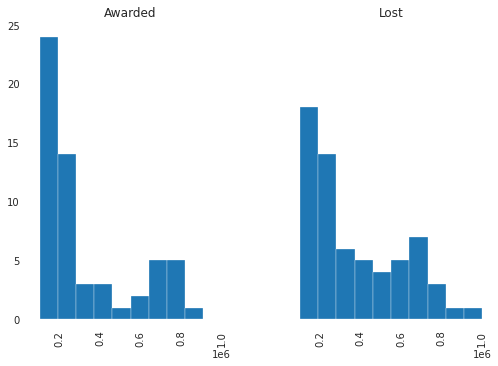

In [136]:
model_data[" Base Bid "].hist(by= model_data['Bid Status'],range =[100001,1000000],sharey=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe23c358bd0>,
      dtype=object)

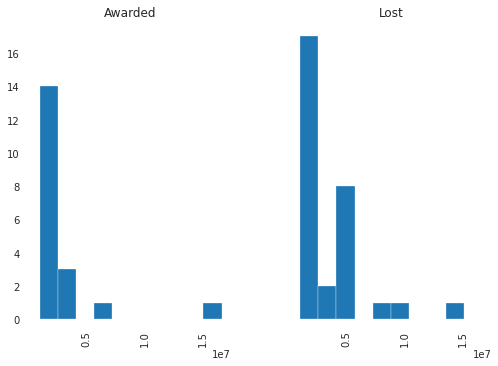

In [137]:
model_data[" Base Bid "].hist(by= model_data['Bid Status'],range =[1000001,16635401],sharey=True)

In [173]:

model_data.groupby(['Estimator','Bid Status']).count()

Project Name  Project Description  City  Local  \
Estimator Bid Status                                                   
 Bill     Awarded                1                    1     1      1   
 Bill     Awarded               16                   16    16     16   
 Brian    Awarded               88                   88    88     88   
          Lost                  19                   19    19     19   
 Don V    Awarded                3                    3     3      3   
          Lost                   3                    3     3      3   
 Doyle    Awarded              407                  407   407    407   
          Lost                  44                   44    44     44   
 Frank    Awarded               41                   41    41     41   
          Lost                  39                   39    39     39   
 Jeff P.  Awarded               10                   10    10     10   
          Lost                   9                    9     9      9   
 Jeff S   Awarded               12                   12    12     12   
          Lost                   1                    1     1      1   
 Ron      Awarded                4                    4     4      4   
          Lost                   8                    8     8      8   
 Rudy     Awarded               12                   12    12     12   
          Lost                  24                   24    24     24   
 Steve    Awarded               40                   40    40     40   
          Lost                  33                   33    33     33   
 Todd L   Awarded                2                    2     2      2   

                      Project Type  Bid Type  Design Type  DEPT   Base Bid   
Estimator Bid Status                                                         
 Bill     Awarded                1         1            1     1           1  
 Bill     Awarded               16        16           16    16          16  
 Brian    Awarded               88        88           88    88          88  
          Lost                  19        19           19    19          19  
 Don V    Awarded                3         3            3     3           3  
          Lost                   3         3            3     3           3  
 Doyle    Awarded              407       407          407   407         407  
          Lost                  44        44           44    44          44  
 Frank    Awarded               41        41           41    41          41  
          Lost                  39        39           39    39          39  
 Jeff P.  Awarded               10        10           10    10          10  
          Lost                   9         9            9     9           9  
 Jeff S   Awarded               12        12           12    12          12  
          Lost                   1         1            1     1           1  
 Ron      Awarded                4         4            4     4           4  
          Lost                   8         8            8     8           8  
 Rudy     Awarded               12        12           12    12          12  
          Lost                  24        24           24    24          24  
 Steve    Awarded               40        40           40    40          40  
          Lost                  33        33           33    33          33  
 Todd L   Awarded                2         2            2     2           2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe237866d10>,
      dtype=object)

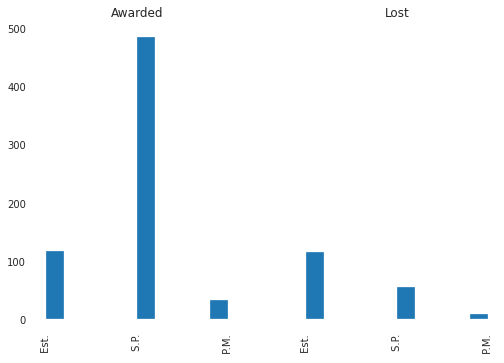

In [165]:

model_data['DEPT'].hist(by= model_data['Bid Status'],sharey = True,sharex=True)

In [166]:
model_data.groupby(['DEPT','Bid Status']).count()

Project Name  Project Description  City  Local  \
DEPT   Bid Status                                                   
 Est.  Awarded              117                  117   117    117   
       Lost                 116                  116   116    116   
 P.M.  Awarded               34                   34    34     34   
       Lost                   9                    9     9      9   
 S.P.  Awarded              485                  485   485    485   
       Lost                  55                   55    55     55   

                   Project Type  Bid Type  Design Type  Estimator   Base Bid   
DEPT   Bid Status                                                              
 Est.  Awarded              117       117          117        117         117  
       Lost                 116       116          116        116         116  
 P.M.  Awarded               34        34           34         34          34  
       Lost                   9         9            9          9           9  
 S.P.  Awarded              485       485          485        485         485  
       Lost                  55        55           55         55          55

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe237603fd0>,
      dtype=object)

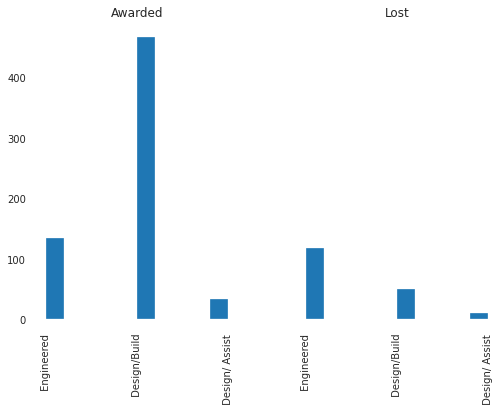

In [174]:
model_data['Design Type'].hist(by= model_data['Bid Status'],sharey = True,sharex=True)

In [184]:
model_data.groupby(['Design Type','Bid Status']).count()

Project Name  Project Description  City  Local  \
Design Type      Bid Status                                                   
 Design/ Assist  Awarded               34                   34    34     34   
                 Lost                  11                   11    11     11   
 Design/Build    Awarded              468                  468   468    468   
                 Lost                  50                   50    50     50   
 Engineered      Awarded              134                  134   134    134   
                 Lost                 119                  119   119    119   

                             Project Type  Bid Type  Estimator  DEPT  \
Design Type      Bid Status                                            
 Design/ Assist  Awarded               34        34         34    34   
                 Lost                  11        11         11    11   
 Design/Build    Awarded              468       468        468   468   
                 Lost                  50        50         50    50   
 Engineered      Awarded              134       134        134   134   
                 Lost                 119       119        119   119   

                              Base Bid   
Design Type      Bid Status              
 Design/ Assist  Awarded             34  
                 Lost                11  
 Design/Build    Awarded            468  
                 Lost                50  
 Engineered      Awarded            134  
                 Lost               119

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f8d893250>,
      dtype=object)

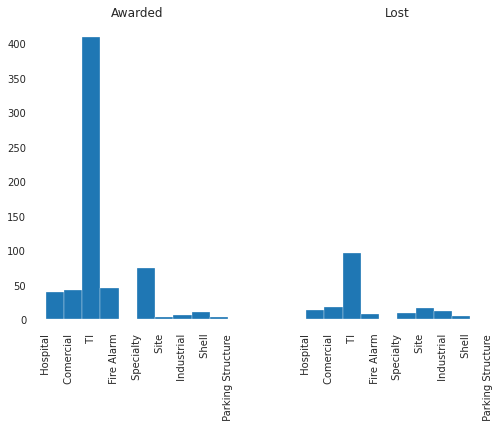

In [97]:
model_data['Project Type'].hist(by= model_data['Bid Status'],sharey = True,sharex=True)

In [197]:
model_data.groupby(['Project Type','Bid Status']).count()

Project Name  Project Description  City  \
Project Type        Bid Status                                            
 Comercial          Awarded               40                   40    40   
                    Lost                  18                   18    18   
 Fire Alarm         Awarded                4                    4     4   
                    Lost                   8                    8     8   
 Hospital           Awarded               45                   45    45   
                    Lost                  14                   14    14   
 Industrial         Awarded               74                   74    74   
                    Lost                  12                   12    12   
 Parking Structure  Awarded                6                    6     6   
                    Lost                   1                    1     1   
 Shell              Awarded                4                    4     4   
                    Lost                   5                    5     5   
 Site               Awarded               42                   42    42   
                    Lost                  16                   16    16   
 Specialty          Awarded               11                   11    11   
                    Lost                  10                   10    10   
 TI                 Awarded              410                  410   410   
                    Lost                  96                   96    96   

                                Local  Bid Type  Design Type  Estimator  DEPT  \
Project Type        Bid Status                                                  
 Comercial          Awarded        40        40           40         40    40   
                    Lost           18        18           18         18    18   
 Fire Alarm         Awarded         4         4            4          4     4   
                    Lost            8         8            8          8     8   
 Hospital           Awarded        45        45           45         45    45   
                    Lost           14        14           14         14    14   
 Industrial         Awarded        74        74           74         74    74   
                    Lost           12        12           12         12    12   
 Parking Structure  Awarded         6         6            6          6     6   
                    Lost            1         1            1          1     1   
 Shell              Awarded         4         4            4          4     4   
                    Lost            5         5            5          5     5   
 Site               Awarded        42        42           42         42    42   
                    Lost           16        16           16         16    16   
 Specialty          Awarded        11        11           11         11    11   
                    Lost           10        10           10         10    10   
 TI                 Awarded       410       410          410        410   410   
                    Lost           96        96           96         96    96   

                                 Base Bid   
Project Type        Bid Status              
 Comercial          Awarded             40  
                    Lost                18  
 Fire Alarm         Awarded              4  
                    Lost                 8  
 Hospital           Awarded             45  
                    Lost                14  
 Industrial         Awarded             74  
                    Lost                12  
 Parking Structure  Awarded              6  
                    Lost                 1  
 Shell              Awarded              4  
                    Lost                 5  
 Site               Awarded             42  
                    Lost                16  
 Specialty          Awarded             11  
                    Lost                10  
 TI                 Awarded            410  
                    Lost                96

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe23745e310>,
      dtype=object)

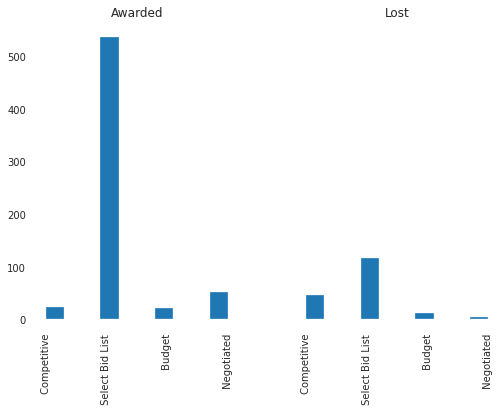

In [199]:
model_data['Bid Type'].hist(by= model_data['Bid Status'],sharey = True,sharex=True)

In [200]:
model_data.groupby(['Bid Type','Bid Status']).count()

Project Name  Project Description  City  Local  \
Bid Type          Bid Status                                                   
 Budget           Awarded               22                   22    22     22   
                  Lost                  12                   12    12     12   
 Competitive      Awarded               24                   24    24     24   
                  Lost                  47                   47    47     47   
 Negotiated       Awarded               53                   53    53     53   
                  Lost                   5                    5     5      5   
 Select Bid List  Awarded              537                  537   537    537   
                  Lost                 116                  116   116    116   

                              Project Type  Design Type  Estimator  DEPT  \
Bid Type          Bid Status                                               
 Budget           Awarded               22           22         22    22   
                  Lost                  12           12         12    12   
 Competitive      Awarded               24           24         24    24   
                  Lost                  47           47         47    47   
 Negotiated       Awarded               53           53         53    53   
                  Lost                   5            5          5     5   
 Select Bid List  Awarded              537          537        537   537   
                  Lost                 116          116        116   116   

                               Base Bid   
Bid Type          Bid Status              
 Budget           Awarded             22  
                  Lost                12  
 Competitive      Awarded             24  
                  Lost                47  
 Negotiated       Awarded             53  
                  Lost                 5  
 Select Bid List  Awarded            537  
                  Lost               116

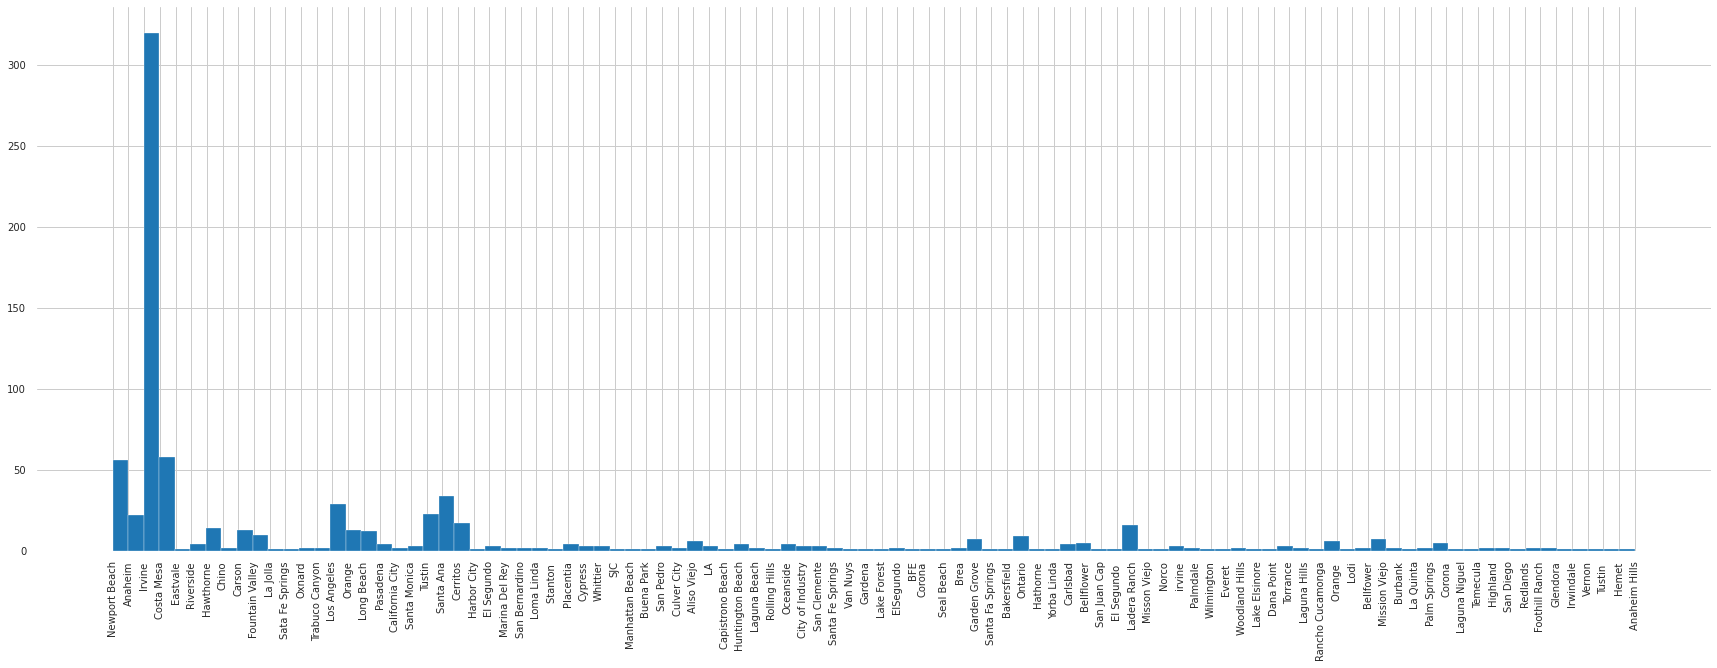

In [75]:
model_data['City'].hist(figsize = (30,10), bins = 98,xrot = 90)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe237505e50>,
      dtype=object)

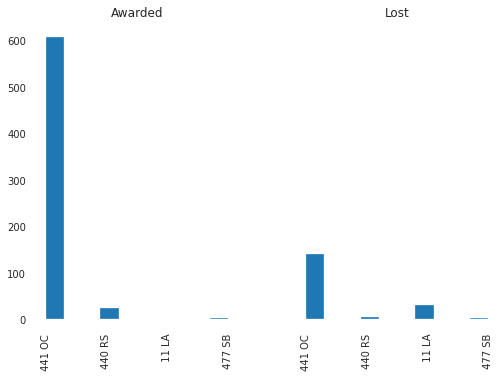

In [189]:
model_data['Local'].hist(by= model_data['Bid Status'],sharey=True,sharex=True)

In [191]:
model_data.groupby(['Local','Bid Status']).count()

Project Name  Project Description  City  Project Type  \
Local      Bid Status                                                          
 11 LA     Awarded               25                   25    25            25   
           Lost                  31                   31    31            31   
 401 Reno  Awarded                1                    1     1             1   
 440 RS    Awarded                2                    2     2             2   
           Lost                   5                    5     5             5   
 441 OC    Awarded              608                  608   608           608   
           Lost                 140                  140   140           140   
 477 SB    Lost                   4                    4     4             4   

                       Bid Type  Design Type  Estimator  DEPT   Base Bid   
Local      Bid Status                                                      
 11 LA     Awarded           25           25         25    25          25  
           Lost              31           31         31    31          31  
 401 Reno  Awarded            1            1          1     1           1  
 440 RS    Awarded            2            2          2     2           2  
           Lost               5            5          5     5           5  
 441 OC    Awarded          608          608        608   608         608  
           Lost             140          140        140   140         140  
 477 SB    Lost               4            4          4     4           4

In [205]:
pd.set_option('display.max_rows', 150)


In [202]:
model_data.groupby(['Design Type','Project Type']).count()

Project Name  Project Description  City  \
Design Type      Project Type                                                   
 Design/ Assist   Comercial                      6                    6     6   
                  Fire Alarm                     1                    1     1   
                  Hospital                       5                    5     5   
                  Industrial                     6                    6     6   
                  Parking Structure              1                    1     1   
                  Site                           3                    3     3   
                  Specialty                      2                    2     2   
                  TI                            21                   21    21   
 Design/Build     Comercial                     31                   31    31   
                  Hospital                      19                   19    19   
                  Industrial                    67                   67    67   
                  Parking Structure              2                    2     2   
                  Shell                          1                    1     1   
                  Site                          43                   43    43   
                  Specialty                      6                    6     6   
                  TI                           349                  349   349   
 Engineered       Comercial                     21                   21    21   
                  Fire Alarm                    11                   11    11   
                  Hospital                      35                   35    35   
                  Industrial                    13                   13    13   
                  Parking Structure              4                    4     4   
                  Shell                          8                    8     8   
                  Site                          12                   12    12   
                  Specialty                     13                   13    13   
                  TI                           136                  136   136   

                                      Local  Bid Type  Estimator  DEPT  \
Design Type      Project Type                                            
 Design/ Assist   Comercial               6         6          6     6   
                  Fire Alarm              1         1          1     1   
                  Hospital                5         5          5     5   
                  Industrial              6         6          6     6   
                  Parking Structure       1         1          1     1   
                  Site                    3         3          3     3   
                  Specialty               2         2          2     2   
                  TI                     21        21         21    21   
 Design/Build     Comercial              31        31         31    31   
                  Hospital               19        19         19    19   
                  Industrial             67        67         67    67   
                  Parking Structure       2         2          2     2   
                  Shell                   1         1          1     1   
                  Site                   43        43         43    43   
                  Specialty               6         6          6     6   
                  TI                    349       349        349   349   
 Engineered       Comercial              21        21         21    21   
                  Fire Alarm             11        11         11    11   
                  Hospital               35        35         35    35   
                  Industrial             13        13         13    13   
                  Parking Structure       4         4          4     4   
                  Shell                   8         8          8     8   
                  Site                   12        12         12    12   


In [204]:
model_data.groupby(['Design Type','Project Type', 'Bid Status']).count()

Project Name  \
Design Type      Project Type        Bid Status                 
 Design/ Assist   Comercial          Awarded                4   
                                     Lost                   2   
                  Fire Alarm         Lost                   1   
                  Hospital           Awarded                4   
                                     Lost                   1   
                  Industrial         Awarded                4   
                                     Lost                   2   
                  Parking Structure  Awarded                1   
                  Site               Awarded                2   
                                     Lost                   1   
                  Specialty          Lost                   2   
                  TI                 Awarded               19   
                                     Lost                   2   
 Design/Build     Comercial          Awarded               27   
                                     Lost                   4   
                  Hospital           Awarded               17   
                                     Lost                   2   
                  Industrial         Awarded               62   
                                     Lost                   5   
                  Parking Structure  Awarded                2   
                  Shell              Awarded                1   
                  Site               Awarded               35   
                                     Lost                   8   
                  Specialty          Awarded                6   
                  TI                 Awarded              318   
                                     Lost                  31   
 Engineered       Comercial          Awarded                9   
                                     Lost                  12   
                  Fire Alarm         Awarded                4   
                                     Lost                   7   
                  Hospital           Awarded               24   
                                     Lost                  11   
                  Industrial         Awarded                8   
                                     Lost                   5   
                  Parking Structure  Awarded                3   
                                     Lost                   1   
                  Shell              Awarded                3   
                                     Lost                   5   
                  Site               Awarded                5   
                                     Lost                   7   
                  Specialty          Awarded                5   
                                     Lost                   8   
                  TI                 Awarded               73   
                                     Lost                  63   

                                                 Project Description  City  \
Design Type      Project Type        Bid Status                              
 Design/ Assist   Comercial          Awarded                       4     4   
                                     Lost                          2     2   
                  Fire Alarm         Lost                          1     1   
                  Hospital           Awarded                       4     4   
                                     Lost                          1     1   
                  Industrial         Awarded                       4     4   
                                     Lost                          2     2   
                  Parking Structure  Awarded                       1     1   
                  Site               Awarded                       2     2   
                                     Lost                          1     1   
                  Specialty          Lost                          2     2   
                  TI                 Awarded

In [206]:
model_data.groupby(['DEPT','Bid Type']).count()

Project Name  Project Description  City  Local  \
DEPT   Bid Type                                                            
 Est.   Budget                      22                   22    22     22   
        Competitive                 61                   61    61     61   
        Negotiated                  30                   30    30     30   
        Select Bid List            120                  120   120    120   
 P.M.   Budget                       1                    1     1      1   
        Competitive                  1                    1     1      1   
        Negotiated                   4                    4     4      4   
        Select Bid List             37                   37    37     37   
 S.P.   Budget                      11                   11    11     11   
        Competitive                  9                    9     9      9   
        Negotiated                  24                   24    24     24   
        Select Bid List            496                  496   496    496   

                          Project Type  Design Type  Estimator  Bid Status  \
DEPT   Bid Type                                                              
 Est.   Budget                      22           22         22          22   
        Competitive                 61           61         61          61   
        Negotiated                  30           30         30          30   
        Select Bid List            120          120        120         120   
 P.M.   Budget                       1            1          1           1   
        Competitive                  1            1          1           1   
        Negotiated                   4            4          4           4   
        Select Bid List             37           37         37          37   
 S.P.   Budget                      11           11         11          11   
        Competitive                  9            9          9           9   
        Negotiated                  24           24         24          24   
        Select Bid List            496          496        496         496   

                           Base Bid   
DEPT   Bid Type                       
 Est.   Budget                    22  
        Competitive               61  
        Negotiated                30  
        Select Bid List          120  
 P.M.   Budget                     1  
        Competitive                1  
        Negotiated                 4  
        Select Bid List           37  
 S.P.   Budget                    11  
        Competitive                9  
        Negotiated                24  
        Select Bid List          496

In [181]:
model_data.groupby(['DEPT','Bid Type','Bid Status']).count()

Project Name  Project Description  City  \
DEPT   Bid Type          Bid Status                                            
 Est.   Budget           Awarded               12                   12    12   
                         Lost                  10                   10    10   
        Competitive      Awarded               20                   20    20   
                         Lost                  41                   41    41   
        Negotiated       Awarded               25                   25    25   
                         Lost                   5                    5     5   
        Select Bid List  Awarded               60                   60    60   
                         Lost                  60                   60    60   
 P.M.   Budget           Awarded                1                    1     1   
        Competitive      Lost                   1                    1     1   
        Negotiated       Awarded                4                    4     4   
        Select Bid List  Awarded               29                   29    29   
                         Lost                   8                    8     8   
 S.P.   Budget           Awarded                9                    9     9   
                         Lost                   2                    2     2   
        Competitive      Awarded                4                    4     4   
                         Lost                   5                    5     5   
        Negotiated       Awarded               24                   24    24   
        Select Bid List  Awarded              448                  448   448   
                         Lost                  48                   48    48   

                                     Local  Project Type  Design Type  \
DEPT   Bid Type          Bid Status                                     
 Est.   Budget           Awarded        12            12           12   
                         Lost           10            10           10   
        Competitive      Awarded        20            20           20   
                         Lost           41            41           41   
        Negotiated       Awarded        25            25           25   
                         Lost            5             5            5   
        Select Bid List  Awarded        60            60           60   
                         Lost           60            60           60   
 P.M.   Budget           Awarded         1             1            1   
        Competitive      Lost            1             1            1   
        Negotiated       Awarded         4             4            4   
        Select Bid List  Awarded        29            29           29   
                         Lost            8             8            8   
 S.P.   Budget           Awarded         9             9            9   
                         Lost            2             2            2   
        Competitive      Awarded         4             4            4   
                         Lost            5             5            5   
        Negotiated       Awarded        24            24           24   
        Select Bid List  Awarded       448           448          448   
                         Lost           48            48           48   

                                     Estimator   Base Bid   
DEPT   Bid Type          Bid Status                         
 Est.   Budget           Awarded            12          12  
                         Lost               10          10  
        Competitive      Awarded            20          20  
                         Lost               41          41  
        Negotiated       Awarded            25          25  
                         Lost                5           5  
        Select Bid List  Awarded            60          60  
                         Lost               60          60  
 P.M.   Budget           Awarded             1           1 

In [207]:
model_data.groupby(['DEPT','Project Type']).count()

Project Name  Project Description  City  Local  \
DEPT   Project Type                                                          
 Est.   Comercial                     21                   21    21     21   
        Fire Alarm                     2                    2     2      2   
        Hospital                      28                   28    28     28   
        Industrial                     8                    8     8      8   
        Parking Structure              3                    3     3      3   
        Shell                          9                    9     9      9   
        Site                          12                   12    12     12   
        Specialty                     17                   17    17     17   
        TI                           133                  133   133    133   
 P.M.   Fire Alarm                    10                   10    10     10   
        Hospital                      15                   15    15     15   
        Site                           1                    1     1      1   
        TI                            17                   17    17     17   
 S.P.   Comercial                     37                   37    37     37   
        Hospital                      16                   16    16     16   
        Industrial                    78                   78    78     78   
        Parking Structure              4                    4     4      4   
        Site                          45                   45    45     45   
        Specialty                      4                    4     4      4   
        TI                           356                  356   356    356   

                            Bid Type  Design Type  Estimator  Bid Status  \
DEPT   Project Type                                                        
 Est.   Comercial                 21           21         21          21   
        Fire Alarm                 2            2          2           2   
        Hospital                  28           28         28          28   
        Industrial                 8            8          8           8   
        Parking Structure          3            3          3           3   
        Shell                      9            9          9           9   
        Site                      12           12         12          12   
        Specialty                 17           17         17          17   
        TI                       133          133        133         133   
 P.M.   Fire Alarm                10           10         10          10   
        Hospital                  15           15         15          15   
        Site                       1            1          1           1   
        TI                        17           17         17          17   
 S.P.   Comercial                 37           37         37          37   
        Hospital                  16           16         16          16   
        Industrial                78           78         78          78   
        Parking Structure          4            4          4           4   
        Site                      45           45         45          45   
        Specialty                  4            4          4           4   
        TI                       356          356        356         356   

                             Base Bid   
DEPT   Project Type                     
 Est.   Comercial                   21  
        Fire Alarm                   2  
        Hospital                    28  
        Industrial                   8  
        Parking Structure            3  
        Shell                        9  
        Site                        12  
        Specialty                   17  
        TI                         133  
 P.M.   Fire Alarm                  10  
        Hospital                    15  
        Site                         1  
        TI                          17  
 S.P.   Comercial      

In [182]:
model_data.groupby(['DEPT','Project Type','Bid Status']).count()

Project Name  Project Description  \
DEPT   Project Type        Bid Status                                      
 Est.   Comercial          Awarded                9                    9   
                           Lost                  12                   12   
        Fire Alarm         Awarded                1                    1   
                           Lost                   1                    1   
        Hospital           Awarded               16                   16   
                           Lost                  12                   12   
        Industrial         Awarded                5                    5   
                           Lost                   3                    3   
        Parking Structure  Awarded                2                    2   
                           Lost                   1                    1   
        Shell              Awarded                4                    4   
                           Lost                   5                    5   
        Site               Awarded                2                    2   
                           Lost                  10                   10   
        Specialty          Awarded                7                    7   
                           Lost                  10                   10   
        TI                 Awarded               71                   71   
                           Lost                  62                   62   
 P.M.   Fire Alarm         Awarded                3                    3   
                           Lost                   7                    7   
        Hospital           Awarded               15                   15   
        Site               Awarded                1                    1   
        TI                 Awarded               15                   15   
                           Lost                   2                    2   
 S.P.   Comercial          Awarded               31                   31   
                           Lost                   6                    6   
        Hospital           Awarded               14                   14   
                           Lost                   2                    2   
        Industrial         Awarded               69                   69   
                           Lost                   9                    9   
        Parking Structure  Awarded                4                    4   
        Site               Awarded               39                   39   
                           Lost                   6                    6   
        Specialty          Awarded                4                    4   
        TI                 Awarded              324                  324   
                           Lost                  32                   32   

                                       City  Local  Bid Type  Design Type  \
DEPT   Project Type        Bid Status                                       
 Est.   Comercial          Awarded        9      9         9            9   
                           Lost          12     12        12           12   
        Fire Alarm         Awarded        1      1         1            1   
                           Lost           1      1         1            1   
        Hospital           Awarded       16     16        16           16   
                           Lost          12     12        12           12   
        Industrial         Awarded        5      5         5            5   
                           Lost           3      3         3            3   
        Parking Structure  Awarded        2      2         2            2   
                           Lost           1      1         1            1   
        Shell              Awarded        4      4         4            4   
                           Lost           5      5         5            5   
        Site               Awarded        2      2         2            

In [208]:
model_data.groupby(['DEPT','Design Type']).count()

Project Name  Project Description  City  Local  \
DEPT   Design Type                                                        
 Est.   Design/ Assist              7                    7     7      7   
        Design/Build               47                   47    47     47   
        Engineered                179                  179   179    179   
 P.M.   Design/ Assist              7                    7     7      7   
        Design/Build                4                    4     4      4   
        Engineered                 32                   32    32     32   
 S.P.   Design/ Assist             31                   31    31     31   
        Design/Build              467                  467   467    467   
        Engineered                 42                   42    42     42   

                         Project Type  Bid Type  Estimator  Bid Status  \
DEPT   Design Type                                                       
 Est.   Design/ Assist              7         7          7           7   
        Design/Build               47        47         47          47   
        Engineered                179       179        179         179   
 P.M.   Design/ Assist              7         7          7           7   
        Design/Build                4         4          4           4   
        Engineered                 32        32         32          32   
 S.P.   Design/ Assist             31        31         31          31   
        Design/Build              467       467        467         467   
        Engineered                 42        42         42          42   

                          Base Bid   
DEPT   Design Type                   
 Est.   Design/ Assist            7  
        Design/Build             47  
        Engineered              179  
 P.M.   Design/ Assist            7  
        Design/Build              4  
        Engineered               32  
 S.P.   Design/ Assist           31  
        Design/Build            467  
        Engineered               42

In [183]:
model_data.groupby(['DEPT','Design Type','Bid Status']).count()

Project Name  Project Description  City  \
DEPT   Design Type      Bid Status                                            
 Est.   Design/ Assist  Awarded                3                    3     3   
                        Lost                   4                    4     4   
        Design/Build    Awarded               33                   33    33   
                        Lost                  14                   14    14   
        Engineered      Awarded               81                   81    81   
                        Lost                  98                   98    98   
 P.M.   Design/ Assist  Awarded                6                    6     6   
                        Lost                   1                    1     1   
        Design/Build    Awarded                4                    4     4   
        Engineered      Awarded               24                   24    24   
                        Lost                   8                    8     8   
 S.P.   Design/ Assist  Awarded               25                   25    25   
                        Lost                   6                    6     6   
        Design/Build    Awarded              431                  431   431   
                        Lost                  36                   36    36   
        Engineered      Awarded               29                   29    29   
                        Lost                  13                   13    13   

                                    Local  Project Type  Bid Type  Estimator  \
DEPT   Design Type      Bid Status                                             
 Est.   Design/ Assist  Awarded         3             3         3          3   
                        Lost            4             4         4          4   
        Design/Build    Awarded        33            33        33         33   
                        Lost           14            14        14         14   
        Engineered      Awarded        81            81        81         81   
                        Lost           98            98        98         98   
 P.M.   Design/ Assist  Awarded         6             6         6          6   
                        Lost            1             1         1          1   
        Design/Build    Awarded         4             4         4          4   
        Engineered      Awarded        24            24        24         24   
                        Lost            8             8         8          8   
 S.P.   Design/ Assist  Awarded        25            25        25         25   
                        Lost            6             6         6          6   
        Design/Build    Awarded       431           431       431        431   
                        Lost           36            36        36         36   
        Engineered      Awarded        29            29        29         29   
                        Lost           13            13        13         13   

                                     Base Bid   
DEPT   Design Type      Bid Status              
 Est.   Design/ Assist  Awarded              3  
                        Lost                 4  
        Design/Build    Awarded             33  
                        Lost                14  
        Engineered      Awarded             81  
                        Lost                98  
 P.M.   Design/ Assist  Awarded              6  
                        Lost                 1  
        Design/Build    Awarded              4  
        Engineered      Awarded             24  
                        Lost                 8  
 S.P.   Design/ Assist  Awarded             25  
                        Lost                 6  
        Design/Build    Awarded            431  
                        Lost                36  
        Engineered      Awarded             29  
                        Lost                13

In [212]:
model_data.groupby([ 'DEPT','Local','Bid Status']).count()

Project Name  Project Description  City  \
DEPT   Local      Bid Status                                            
 Est.   11 LA     Awarded               11                   11    11   
                  Lost                  23                   23    23   
        401 Reno  Awarded                1                    1     1   
        440 RS    Awarded                2                    2     2   
                  Lost                   4                    4     4   
        441 OC    Awarded              103                  103   103   
                  Lost                  85                   85    85   
        477 SB    Lost                   4                    4     4   
 P.M.   11 LA     Awarded                2                    2     2   
                  Lost                   5                    5     5   
        441 OC    Awarded               32                   32    32   
                  Lost                   4                    4     4   
 S.P.   11 LA     Awarded               12                   12    12   
                  Lost                   3                    3     3   
        440 RS    Lost                   1                    1     1   
        441 OC    Awarded              473                  473   473   
                  Lost                  51                   51    51   

                              Project Type  Bid Type  Design Type  Estimator  \
DEPT   Local      Bid Status                                                   
 Est.   11 LA     Awarded               11        11           11         11   
                  Lost                  23        23           23         23   
        401 Reno  Awarded                1         1            1          1   
        440 RS    Awarded                2         2            2          2   
                  Lost                   4         4            4          4   
        441 OC    Awarded              103       103          103        103   
                  Lost                  85        85           85         85   
        477 SB    Lost                   4         4            4          4   
 P.M.   11 LA     Awarded                2         2            2          2   
                  Lost                   5         5            5          5   
        441 OC    Awarded               32        32           32         32   
                  Lost                   4         4            4          4   
 S.P.   11 LA     Awarded               12        12           12         12   
                  Lost                   3         3            3          3   
        440 RS    Lost                   1         1            1          1   
        441 OC    Awarded              473       473          473        473   
                  Lost                  51        51           51         51   

                               Base Bid   
DEPT   Local      Bid Status              
 Est.   11 LA     Awarded             11  
                  Lost                23  
        401 Reno  Awarded              1  
        440 RS    Awarded              2  
                  Lost                 4  
        441 OC    Awarded            103  
                  Lost                85  
        477 SB    Lost                 4  
 P.M.   11 LA     Awarded              2  
                  Lost                 5  
        441 OC    Awarded             32  
                  Lost                 4  
 S.P.   11 LA     Awarded             12  
                  Lost                 3  
        440 RS    Lost                 1  
        441 OC    Awarded            473  
                  Lost                51

In [213]:
model_data.groupby([ 'Bid Type','Local','Bid Status']).count()

Project Name  Project Description  \
Bid Type          Local      Bid Status                                      
 Budget            11 LA     Awarded                2                    2   
                             Lost                   1                    1   
                   440 RS    Lost                   3                    3   
                   441 OC    Awarded               20                   20   
                             Lost                   7                    7   
                   477 SB    Lost                   1                    1   
 Competitive       11 LA     Awarded                1                    1   
                             Lost                   5                    5   
                   440 RS    Lost                   1                    1   
                   441 OC    Awarded               23                   23   
                             Lost                  41                   41   
 Negotiated        11 LA     Awarded                4                    4   
                   440 RS    Awarded                1                    1   
                   441 OC    Awarded               48                   48   
                             Lost                   4                    4   
                   477 SB    Lost                   1                    1   
 Select Bid List   11 LA     Awarded               18                   18   
                             Lost                  25                   25   
                   401 Reno  Awarded                1                    1   
                   440 RS    Awarded                1                    1   
                             Lost                   1                    1   
                   441 OC    Awarded              517                  517   
                             Lost                  88                   88   
                   477 SB    Lost                   2                    2   

                                         City  Project Type  Design Type  \
Bid Type          Local      Bid Status                                    
 Budget            11 LA     Awarded        2             2            2   
                             Lost           1             1            1   
                   440 RS    Lost           3             3            3   
                   441 OC    Awarded       20            20           20   
                             Lost           7             7            7   
                   477 SB    Lost           1             1            1   
 Competitive       11 LA     Awarded        1             1            1   
                             Lost           5             5            5   
                   440 RS    Lost           1             1            1   
                   441 OC    Awarded       23            23           23   
                             Lost          41            41           41   
 Negotiated        11 LA     Awarded        4             4            4   
                   440 RS    Awarded        1             1            1   
                   441 OC    Awarded       48            48           48   
                             Lost           4             4            4   
                   477 SB    Lost           1             1            1   
 Select Bid List   11 LA     Awarded       18            18           18   
                             Lost          25            25           25   
                   401 Reno  Awarded        1             1            1   
                   440 RS    Awarded        1             1            1   
                             Lost           1             1            1   
                   441 OC    Awarded      517           517          517   
                             Lost          88            88           88   
                   477 SB    Lost           2             2            2   

                                   

In [216]:
model_data.groupby([ 'Design Type','Project Type','Bid Status']).count()

Project Name  \
Design Type      Project Type        Bid Status                 
 Design/ Assist   Comercial          Awarded                4   
                                     Lost                   2   
                  Fire Alarm         Lost                   1   
                  Hospital           Awarded                4   
                                     Lost                   1   
                  Industrial         Awarded                4   
                                     Lost                   2   
                  Parking Structure  Awarded                1   
                  Site               Awarded                2   
                                     Lost                   1   
                  Specialty          Lost                   2   
                  TI                 Awarded               19   
                                     Lost                   2   
 Design/Build     Comercial          Awarded               27   
                                     Lost                   4   
                  Hospital           Awarded               17   
                                     Lost                   2   
                  Industrial         Awarded               62   
                                     Lost                   5   
                  Parking Structure  Awarded                2   
                  Shell              Awarded                1   
                  Site               Awarded               35   
                                     Lost                   8   
                  Specialty          Awarded                6   
                  TI                 Awarded              318   
                                     Lost                  31   
 Engineered       Comercial          Awarded                9   
                                     Lost                  12   
                  Fire Alarm         Awarded                4   
                                     Lost                   7   
                  Hospital           Awarded               24   
                                     Lost                  11   
                  Industrial         Awarded                8   
                                     Lost                   5   
                  Parking Structure  Awarded                3   
                                     Lost                   1   
                  Shell              Awarded                3   
                                     Lost                   5   
                  Site               Awarded                5   
                                     Lost                   7   
                  Specialty          Awarded                5   
                                     Lost                   8   
                  TI                 Awarded               73   
                                     Lost                  63   

                                                 Project Description  City  \
Design Type      Project Type        Bid Status                              
 Design/ Assist   Comercial          Awarded                       4     4   
                                     Lost                          2     2   
                  Fire Alarm         Lost                          1     1   
                  Hospital           Awarded                       4     4   
                                     Lost                          1     1   
                  Industrial         Awarded                       4     4   
                                     Lost                          2     2   
                  Parking Structure  Awarded                       1     1   
                  Site               Awarded                       2     2   
                                     Lost                          1     1   
                  Specialty          Lost                          2     2   
                  TI                 Awarded

In [ ]:
model_data.drop(303,inplace =True)